In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image

In [ ]:
# Download image data
(train_digits, train_labels), (test_digits, test_labels) = load_data()

# 56x56

In [ ]:
new_train_digits = []
for i in range(1,len(train_digits)+1):
  temp = Image.fromarray(train_digits[i-1])
  temp = temp.resize((56, 56))
  new_train_digits.append(np.array(temp))
print(i)

60000


In [ ]:
new_test_digits = []
for i in range(1,len(test_digits)+1):
  temp = Image.fromarray(test_digits[i-1])
  temp = temp.resize((56, 56))
  new_test_digits.append(np.array(temp))
print(i)

10000


In [ ]:
train_digits = np.array(new_train_digits)
test_digits = np.array(new_test_digits)

In [ ]:
# Num of Samples = 60000, shape of Image = 28x28 (Height x Width)
train_digits.shape

(60000, 56, 56)

In [ ]:
test_digits.shape

(10000, 56, 56)

#### Dsiplay Image Data

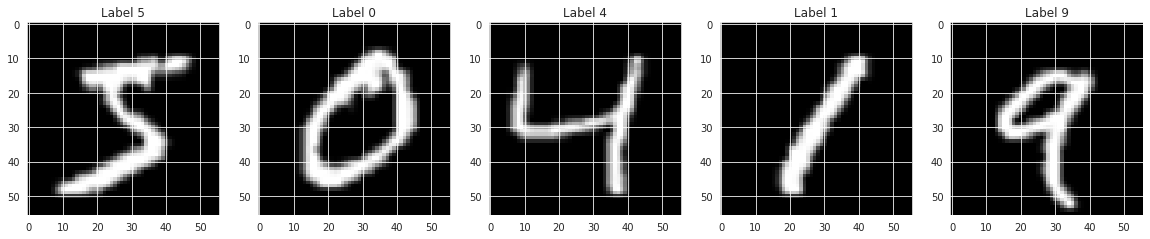

In [ ]:
plt.figure(figsize = (20,4))

for index, (image,label) in enumerate(zip(train_digits[0:5], train_labels[0:5])):
    plt.subplot(1, 5, index+1)
    # This convert arrays into images
    plt.imshow(np.reshape(image, (56,56)), cmap = 'gray')
    plt.title("Label %i" %label, fontsize = 12)
plt.show()

#### Labels

In [ ]:
pd.Series(train_labels).unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

#### Reshaping of target into Categorical Data

In [ ]:
# For multi-class use one-hot encoding
from tensorflow.keras.utils import to_categorical
num_classes = 10
train_labels_cat = to_categorical(train_labels, num_classes)
test_labels_cat = to_categorical(test_labels, num_classes)

In [ ]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
train_data = train_digits.reshape(60000, 3136)
test_data = test_digits.reshape(10000, 3136)

#### Image Normalization

In [ ]:
train_data1 = train_data.astype('float32') / 255
test_data1 = test_data.astype('float32') / 255

#### Split Data into Train & Validation

In [ ]:
from sklearn.model_selection import train_test_split
train_data2, val_data, train_label1, val_label = train_test_split(train_data1, train_labels_cat, test_size = 0.1, random_state=2)

In [ ]:
train_data2.shape

(54000, 3136)

In [ ]:
train_label1.shape

(54000, 10)

In [ ]:
val_data.shape

(6000, 3136)

#### ANN Classification

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
# Optimizers 
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model():
    # Sequential Neural Network - FeedForward NN
    model = Sequential()
    # Units = Num of Neurons(2 * pow(n)), input_shape = number of features.
    model.add(Dense(units = 64, activation = 'relu', input_shape = [train_data2.shape[1]]))
    model.add(Dropout(0.2))
    # Hidden Layer - I
    model.add(Dense(units = 128, activation = 'relu'))
    model.add(Dropout(0.2))
    # Hidden Layer - II
    model.add(Dense(units = 256, activation = 'relu'))
    model.add(Dropout(0.2))
    # Output Layer 
    model.add(Dense(units = 10, activation = 'softmax'))
    # Optimizers
    optimizers = Adam(learning_rate = 0.001)
    
    # Model Compiler
    model.compile(loss = 'categorical_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
    
    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                200768    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2

In [ ]:
import time

In [ ]:
start = time.time()
history = model.fit(train_data2, train_label1, epochs = 50, batch_size = 32, validation_data = (val_data, val_label))
stop = time.time()
time_56 = stop - start

Epoch 1/50
1688/1688 [==============================] - 10s 5ms/step - loss: 0.3923 - accuracy: 0.8797 - val_loss: 0.1758 - val_accuracy: 0.9477
Epoch 2/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2394 - accuracy: 0.9278 - val_loss: 0.1426 - val_accuracy: 0.9553
Epoch 3/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2033 - accuracy: 0.9396 - val_loss: 0.1377 - val_accuracy: 0.9568
Epoch 4/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1859 - accuracy: 0.9456 - val_loss: 0.1274 - val_accuracy: 0.9600
Epoch 5/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1718 - accuracy: 0.9498 - val_loss: 0.1198 - val_accuracy: 0.9625
Epoch 6/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1641 - accuracy: 0.9509 - val_loss: 0.1123 - val_accuracy: 0.9653
Epoch 7/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1543 - accuracy: 0.9529 - val_loss: 0.1317 - val_accuracy

In [ ]:
result_56 = model.evaluate(test_data1, test_labels_cat, batch_size=128)

79/79 [==============================] - 0s 4ms/step - loss: 0.1037 - accuracy: 0.9747


In [ ]:
time_56

442.8674762248993

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.392309,0.879704,0.175800,0.947667
1,0.239361,0.927796,0.142623,0.955333
2,0.203305,0.939611,0.137731,0.956833
3,0.185921,0.945593,0.127433,0.960000
4,0.171803,0.949833,0.119850,0.962500
5,0.164068,0.950944,0.112311,0.965333
6,0.154263,0.952907,0.131736,0.960500
7,0.150862,0.953907,0.111584,0.967500
8,0.140675,0.957963,0.116135,0.964000
9,0.135550,0.959426,0.104672,0.968667


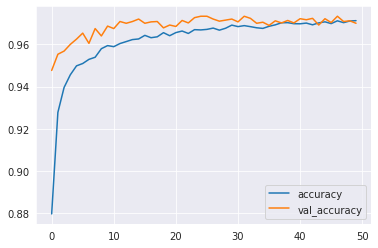

In [ ]:
sns.set_style('darkgrid')
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.show()

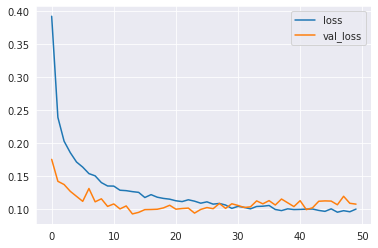

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.show()

# 28x28

In [ ]:
# Download image data
(train_digits, train_labels), (test_digits, test_labels) = load_data()

In [ ]:
# Num of Samples = 60000, shape of Image = 28x28 (Height x Width)
train_digits.shape

(60000, 28, 28)

In [ ]:
test_digits.shape

(10000, 28, 28)

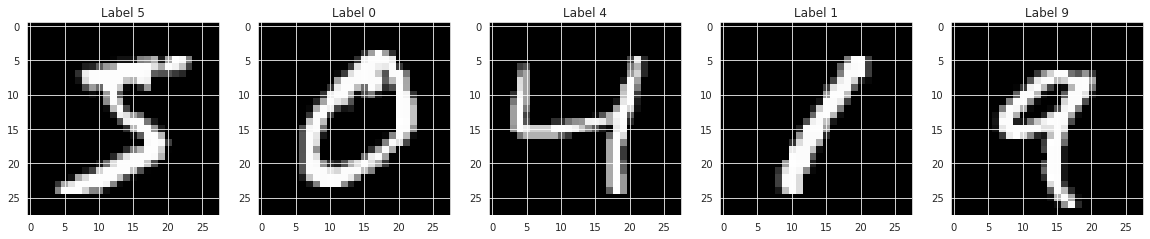

In [ ]:
plt.figure(figsize = (20,4))

for index, (image,label) in enumerate(zip(train_digits[0:5], train_labels[0:5])):
    plt.subplot(1, 5, index+1)
    # This convert arrays into images
    plt.imshow(np.reshape(image, (28,28)), cmap = 'gray')
    plt.title("Label %i" %label, fontsize = 12)
plt.show()

In [ ]:
pd.Series(train_labels).unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

In [ ]:
# For multi-class use one-hot encoding
from tensorflow.keras.utils import to_categorical
num_classes = 10
train_labels_cat = to_categorical(train_labels, num_classes)
test_labels_cat = to_categorical(test_labels, num_classes)

In [ ]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
train_data = train_digits.reshape(60000, 784)
test_data = test_digits.reshape(10000, 784)

In [ ]:
train_data1 = train_data.astype('float32') / 255
test_data1 = test_data.astype('float32') / 255

In [ ]:
from sklearn.model_selection import train_test_split
train_data2, val_data, train_label1, val_label = train_test_split(train_data1, train_labels_cat, test_size = 0.1, random_state=2)

In [ ]:
train_data2.shape

(54000, 784)

In [ ]:
train_label1.shape

(54000, 10)

In [ ]:
val_data.shape

(6000, 784)

In [ ]:
model = build_model()

In [ ]:
start = time.time()
history = model.fit(train_data2, train_label1, epochs = 50, batch_size = 32, validation_data = (val_data, val_label))
stop = time.time()
time_28 = stop - start

Epoch 1/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3821 - accuracy: 0.8823 - val_loss: 0.1630 - val_accuracy: 0.9518
Epoch 2/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2058 - accuracy: 0.9384 - val_loss: 0.1323 - val_accuracy: 0.9583
Epoch 3/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1721 - accuracy: 0.9490 - val_loss: 0.1150 - val_accuracy: 0.9652
Epoch 4/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1528 - accuracy: 0.9539 - val_loss: 0.1075 - val_accuracy: 0.9663
Epoch 5/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1394 - accuracy: 0.9574 - val_loss: 0.1016 - val_accuracy: 0.9690
Epoch 6/50
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1293 - accuracy: 0.9601 - val_loss: 0.0960 - val_accuracy: 0.9710
Epoch 7/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1208 - accuracy: 0.9621 - val_loss: 0.0977 - val_accuracy:

In [ ]:
result_28 = model.evaluate(test_data1, test_labels_cat, batch_size=128)

79/79 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 0.9749


In [ ]:
time_28

382.6332485675812

## Accuracy and time taken 

In [ ]:
print("Model training time for 28x28 : ", time_28, "sec")
print("Model training time for 56x56 : ", time_56, "sec")

print("Accuracy for 28x28 : ", result_28[1])
print("Accuracy for 56x56 : ", result_56[1])

Model training time for 28x28 :  382.6332485675812 sec
Model training time for 56x56 :  442.8674762248993 sec
Accuracy for 28x28 :  0.9749000072479248
Accuracy for 56x56 :  0.9746999740600586


#### Making New Predictions

In [ ]:
import cv2

import numpy as np
import pandas as pd
import cv2 as cv 
# from google.colab.patches import cv2_imshow # for image display
# from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [ ]:
# 0 = stands for reading image as grayscale
img = cv2.imread('/content/drive/MyDrive/2.png', 0)

In [ ]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])

uint8
56
56


In [ ]:
img = cv2.resize(img, (56,56))

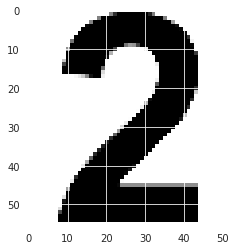

In [ ]:
plt.imshow(np.reshape(img, (56,56)), cmap = 'gray')
plt.show()

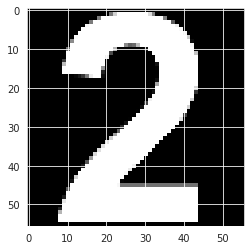

In [ ]:
img = cv2.bitwise_not(img)
plt.imshow(np.reshape(img, (56,56)), cmap = 'gray')
plt.show()

In [ ]:
img_new = img.reshape(1, 3136)

In [ ]:
ans = model.predict(img_new)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                200768    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2

In [ ]:
print(ans.shape)
print(ans)
print(np.argmax(ans))

(1, 10)
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
2


In [ ]:
yhat = np.argmax(model.predict(img_new))

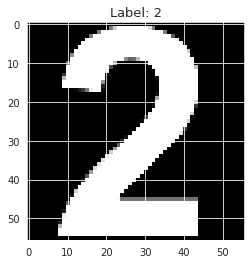

In [ ]:
plt.imshow(np.reshape(img, (56, 56)), cmap = 'gray')
plt.title("Label: %i" %yhat, fontsize = 13)
plt.show()